###**Principal component Analysis (PCA) for Data compression**###
PCA is an unsupervised learning approach which essentially compresses data from high dimension to lower dimension and lower dimension data is called principal component or latent factors. It’s going to cluster the data based on similarity and differences based on the Eigen value.
PCA compresses the data without losing important information. PCA compresses the core information into the principal component or PCA. PCA decomposed the data using Singular value decomposition (SVD) to projects into lower dimensional space.
In this Notebook, i will analyze the PCA on breast cancer dataset which has 30 features.

**By- Md. Azim Khan**


In [ ]:
# importing necessary libraies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [ ]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# data_staticts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.columns # 30 features name 

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
# Using PCA this 30 dimensional features will be reduced
from sklearn.preprocessing import scale # data scaling
from sklearn import decomposition #PCA


In [ ]:
X=cancer.data
Y=cancer.target

In [ ]:
X=scale(X)

In [ ]:
pca=decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
PCname=[]
for i in range(1,31):
  PC='PC'+str((i))
  PCname.append(PC)

In [ ]:
scores=pca.transform(X) # scores represent the orginal data set value
scores_df=pd.DataFrame(scores, columns=PCname)
scores_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601793,0.745116,-0.265471,-0.549563,-0.133768,0.345565,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008975,-0.648809,-0.017212,0.318297,0.247565,-0.114133,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0.325111,0.190918,-0.087975,0.392626,-0.204532,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0.051370,0.482634,-0.035875,0.026748,-0.464734,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,-0.152606,0.133142,-0.018714,-0.461436,0.065495,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342,-0.051723,-0.404290,0.652750,0.147642,0.348266,-0.195214,0.246315,-0.404446,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222753,-0.192637,0.015555,-0.069975,-0.138184,0.293495,-0.109046,0.182521,-0.229947,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418,0.285691,0.090998,-0.232648,-0.065615,0.021108,0.042020,-0.081420,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,-0.178628,-0.697461,1.225195,0.218698,0.229591,-0.061047,-0.168514,-0.306874,-0.310569,0.173216,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


### **observation:**
Here total 30 features converted into 30 principal component (PC1…PC30) labels that showed the linear weights for each PCs.


**Lodading Matrix:**
To generate loading Matrix, we need to find out the correlation matrix; because the variable having the highest correlation with the columns will be the first principal component. For example, the variable or Feature “worst concave points has the highest correlation with PC1, therefore, worst concave will be PC1

In [ ]:
# now loadings matrix
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=PCname, index=cancer.feature_names)
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean radius,0.218902,-0.233857,-0.008531,0.041409,0.037786,0.018741,-0.124088,-0.007452,-0.223110,0.095486,0.041471,0.051067,0.011967,0.059506,0.051119,-0.150584,0.202924,0.146712,-0.225385,-0.049699,-0.068570,0.072929,-0.098553,0.182579,0.019226,-0.129476,-0.131527,0.211194,0.211460,-0.702414
mean texture,0.103725,-0.059706,0.064550,-0.603050,-0.049469,-0.032179,0.011400,0.130675,0.112699,0.240934,-0.302243,0.254896,0.203461,-0.021560,0.107922,-0.157842,-0.038706,-0.041103,-0.029789,-0.244135,0.448369,0.094801,-0.000555,-0.098787,-0.084746,-0.024557,-0.017357,-0.000066,-0.010534,-0.000274
mean perimeter,0.227537,-0.215181,-0.009314,0.041983,0.037375,0.017308,-0.114477,-0.018687,-0.223739,0.086386,0.016783,0.038926,0.044110,0.048514,0.039903,-0.114454,0.194821,0.158317,-0.239595,-0.017665,-0.069769,0.075160,-0.040245,0.116649,-0.027015,-0.125256,-0.115415,0.084338,0.383826,0.689897
mean area,0.220995,-0.231077,0.028700,0.053434,0.010331,-0.001888,-0.051653,0.034674,-0.195586,0.074956,0.110170,0.065438,0.067376,0.010831,-0.013967,-0.132448,0.255706,0.266168,0.027322,-0.090144,-0.018443,0.097566,0.007777,-0.069848,0.210041,0.362727,0.466612,-0.272508,-0.422795,0.032947
mean smoothness,0.142590,0.186113,-0.104292,0.159383,-0.365089,-0.286374,-0.140669,-0.288975,0.006425,-0.069293,-0.137022,0.316727,0.045574,0.445065,0.118143,-0.204613,0.167930,-0.352227,0.164566,0.017101,-0.119492,0.063823,-0.020666,-0.068697,-0.028955,-0.037004,0.069690,0.001479,-0.003435,0.004847
mean compactness,0.239285,0.151892,-0.074092,0.031795,0.011704,-0.014131,0.030918,-0.151396,-0.167841,0.012936,-0.308010,-0.104017,0.229281,0.008101,-0.230900,0.170178,-0.020308,0.007794,-0.284222,0.488686,0.192621,-0.098078,0.052360,0.104136,-0.396623,0.262808,0.097749,-0.005463,-0.041017,-0.044674
mean concavity,0.258400,0.060165,0.002734,0.019123,0.086375,-0.009344,-0.107520,-0.072827,0.040591,-0.135602,0.124190,0.065653,0.387091,-0.189359,0.128284,0.269470,-0.001598,-0.026968,-0.002266,-0.033387,0.005572,-0.185212,0.324870,-0.044741,0.096977,-0.548876,0.364808,0.045539,-0.010015,-0.025139
mean concave points,0.260854,-0.034768,-0.025564,0.065336,-0.043861,-0.052050,-0.150482,-0.152322,-0.111971,0.008055,-0.072446,0.042589,0.132138,-0.244795,0.217099,0.380464,0.034510,-0.082828,0.154972,-0.235408,-0.009424,-0.311852,-0.051409,-0.084028,0.186452,0.387643,-0.454699,-0.008883,-0.004207,0.001077
mean symmetry,0.138167,0.190349,-0.040240,0.067125,-0.305941,0.356458,-0.093891,-0.231531,0.256040,0.572069,0.163054,-0.288866,0.189934,0.030739,0.073962,-0.164662,-0.191738,0.173398,0.058811,0.026069,-0.086938,-0.018407,-0.051201,-0.019339,0.024584,-0.016044,-0.015165,0.001433,-0.007570,0.001280
mean fractal dimension,0.064363,0.366575,-0.022574,0.048587,-0.044424,-0.119431,0.295760,-0.177121,-0.123741,0.081103,-0.038048,0.236359,0.106239,-0.377079,-0.517976,-0.040793,0.050225,0.087867,0.058157,-0.175637,-0.076272,0.287869,-0.084690,0.133261,0.207222,-0.097405,-0.101245,-0.006312,0.007301,0.004756


**Variance:**
Variance explained by each principal component: To reduce features from original data and find out the optimum value of principal component so that selected PC’s can represent the at least 95% of data, we need to calculate variance. Variance tells us how much PCA1 values contribute to the overall variance of the data set and how much does the second principal component contribute to the overall variance of the dataset and how much does the 3rd principal component contribute to the overall variance of the dataset and so on. In order to decide the number of Principal Components, we analyze the proportion of variance explained by each component and later select the optimum number of PCs.

In [ ]:
explained_var=pca.explained_variance_
explained_var


array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [ ]:
cumulative_variance=np.cumsum(np.round(explained_variance, decimals=3))
cumulative_variance

array([0.443, 0.633, 0.727, 0.793, 0.848, 0.888, 0.911, 0.927, 0.941,
       0.953, 0.963, 0.972, 0.98 , 0.985, 0.988, 0.991, 0.993, 0.995,
       0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003, 1.003, 1.003,
       1.003, 1.003, 1.003])

**Observation:**
These are the 30 principal components and PC1 is the highest variance of the total 30 principal components. And variance presented in above array is decreasing order. One thing is that highest 3 to 5 principal component explain the most feature of the data set. Now ratio of variance explained by each component and can be understood that 1st principal component carries how much than overall component.
We can now look at the proportion of variance explained by each PC. From the output we find that PC1 explains 44.27% of the variance, PC2 explains 18.97% and so on. Total 63.24%(PC1+PC2) represent the data only by two principal components. We find from cumulative variance that the first seven components explain approximately 91.1% of the variance.


In [ ]:
pc_df=pd.DataFrame(PCname, columns=['PC'])
explained_variance_df=pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df=pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [ ]:
df_explained_variance= pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,PC1,0.442720,0.443
1,PC2,0.189712,0.633
2,PC3,0.093932,0.727
3,PC4,0.066021,0.793
4,PC5,0.054958,0.848
5,PC6,0.040245,0.888
6,PC7,0.022507,0.911
7,PC8,0.015887,0.927
8,PC9,0.013896,0.941
9,PC10,0.011690,0.953


**PCA graph:**

We got the proportion of variance explained by each component which we need to decide the number of components. We calculated the first seven components explain most of the variance, however, for a more visual approach, we plot the explained variance on a line graph. This PCA chart helps us to decide the optimum number of principal components.


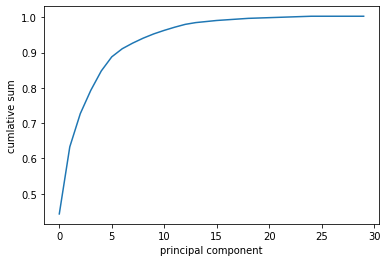

In [ ]:
plt.xlabel('principal component')
plt.ylabel('cumlative sum')
plt.plot(cumulative_variance)
plt.show()

**References:**

1.	M. Al-Rubaie, P. Wu, J. M. Chang and S. Kung, "Privacy-preserving PCA on horizontally-partitioned data," 2017 IEEE Conference on Dependable and Secure Computing, Taipei, 2017, pp. 280-287, doi: 10.1109/DESEC.2017.8073817.

2.	P. R. Oliveira and R. F. Romero, "A comparision between PCA neural networks and the JPEG standard for performing image compression," Proceedings II Workshop on Cybernetic Vision, Sao Carlos, Brazil, 1996, pp. 112-116, doi: 10.1109/CYBVIS.1996.629449.

3.	S.Y. Kung “Discriminant component analysis for privacy protection and visualization of big data,” Multimedia Tools and Applications, pp. 1–36, 2015.

4.	Gilbert String “Principal component Analysis by SVD” in Introduction to Linear Algebra, 5th Edition, section. 7.3, pp 382-391
